In [272]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from typing import List, Dict
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [311]:
class ResultsAnalysis:
    cancer_types: List[str] = ['CLL', 'FL', 'MCL']
    n_cancer_types: int = len(cancer_types)

    def __init__(self, results: str):
        self.results = pd.read_csv(results, index_col=0)

    def cumulative_confusion_matrix(self):
        cf_matrix = confusion_matrix(self.results['y'], self.results['y_pred'])
        cf_matrix = np.asarray(cf_matrix)

        fig, ax = plt.subplots(figsize=(8,8))
        im = ax.imshow(cf_matrix, cmap='Blues')

        ax.set_title('Cumulative Confusion Matrix')
        fig.tight_layout()

        ax.set_xticks(range(self.n_cancer_types)), ax.set_yticks(range(self.n_cancer_types))
        ax.set_xticklabels(self.cancer_types), ax.set_yticklabels(self.cancer_types)

        text_colors = ['k', 'w']
        text_color_threshold = 25
        for i in range(self.n_cancer_types):
            for j in range(self.n_cancer_types):
                text = ax.text(j, i, cf_matrix[i, j],
                               ha="center", va="center", color=text_colors[cf_matrix[i, j] > text_color_threshold])

    def calculate_class_stats(self):

        value_counts = self.results.value_counts()

        for type_ in self.cancer_types:
            """create confusion dict objects"""
            setattr(self, f'{type_}_confusion', {})

            TP, FP, FN = value_counts.loc[type_, type_], len(self.results[(self.results['y_pred'] == type_) & (self.results['y'] != type_)]), len(self.results[(self.results['y_pred'] != type_) & (self.results['y'] == type_)])

            getattr(self, f'{type_}_confusion')['TP'] = TP
            getattr(self, f'{type_}_confusion')['FP'] = FP
            getattr(self, f'{type_}_confusion')['FN'] = FN
            getattr(self, f'{type_}_confusion')['TN'] = len(self.results) - TP - FP - FN

    def class_confusion_matrices(self):

        fig, ax = plt.subplots(1, self.n_cancer_types, figsize=(15,15))

        for i, type_ in enumerate(self.cancer_types):
            confusion = getattr(self, f'{type_}_confusion')
            matrix = np.array([[confusion['TP'], confusion['FP']], [confusion['FN'], confusion['TN']]])
            ax[i].set_title(f'{type_} Confusion Matrix')
            ax[i].set_xlabel('Actual'), ax[i].set_ylabel('Prediction')
            im = ax[i].imshow(matrix, cmap='Blues')

            ax[i].set_xticks(range(2)), ax[i].set_yticks(range(2))
            ax[i].set_xticklabels(['T','F']), ax[i].set_yticklabels(['T','F'])

            text_colors, text_color_threshold = ['k', 'w'], 40
            for j in range(2):
                for k in range(2):
                    text = ax[i].text(k, j, matrix[j, k],
                                   ha="center", va="center", color=text_colors[matrix[j, k] > text_color_threshold])

            fig.tight_layout()



results_analysis = ResultsAnalysis('../final_results.csv')

In [312]:
# results_analysis = ResultsAnalysis('../final_results.csv')

In [313]:
results_analysis.results.head()

,y,y_pred
0,CLL,CLL
1,CLL,CLL
2,CLL,CLL
3,CLL,CLL
4,CLL,CLL


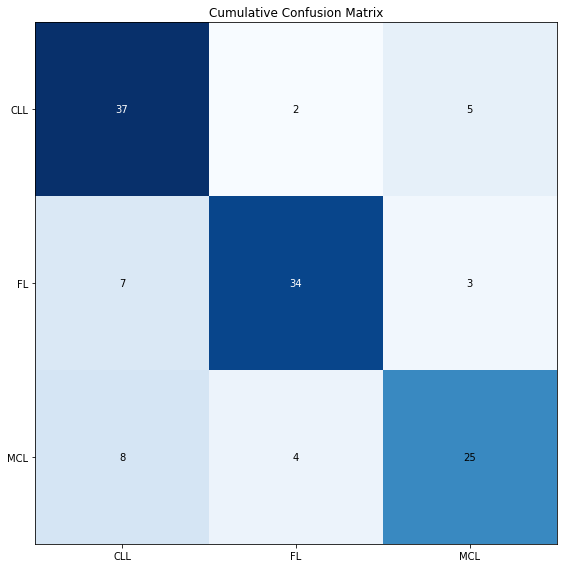

In [314]:
results_analysis.cumulative_confusion_matrix()

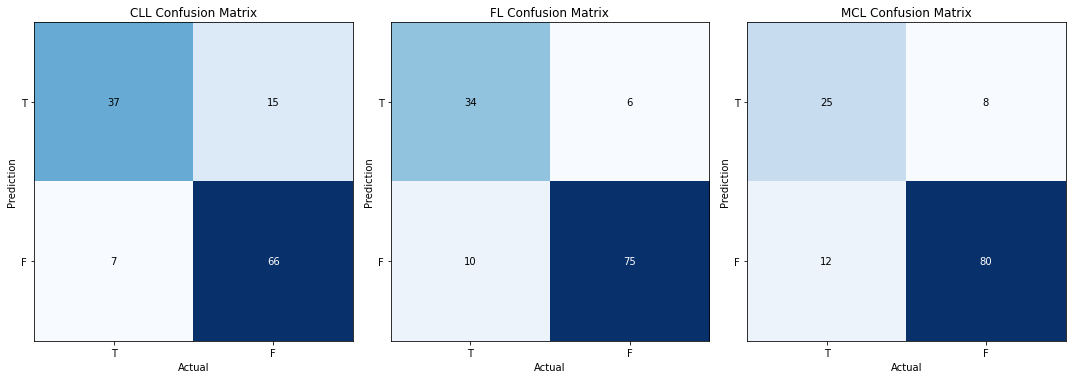

In [315]:
results_analysis.calculate_class_stats()
results_analysis.class_confusion_matrices()

In [310]:
print(results_analysis.CLL_confusion, results_analysis.FL_confusion, results_analysis.MCL_confusion)

{'TP': 37, 'FP': 15, 'FN': 7, 'TN': 66} {'TP': 34, 'FP': 6, 'FN': 10, 'TN': 75} {'TP': 25, 'FP': 8, 'FN': 12, 'TN': 80}
